In [30]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Plot options

In [50]:
sns.set_style("whitegrid")

SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# 1. Naive forecasting

It is basically doing: 
$$F_t  = D_{t - \alpha} + \beta$$

Usually $\alpha = 1$ and $\beta = 0$ is taken.

Obs:
1) Very responsive method (React immeadiatly under the change of demand in the previous period).
2) Noisy (No nosie filter is applied)

## 1.1. Example

In [93]:
demand = pd.read_csv("Forecast-Example-Data.csv")
# Reverse rows in pandas: [::-1]
naive_forecast = (demand[::-1].append(pd.Series(), ignore_index=True))[::-1].reset_index(drop = True)

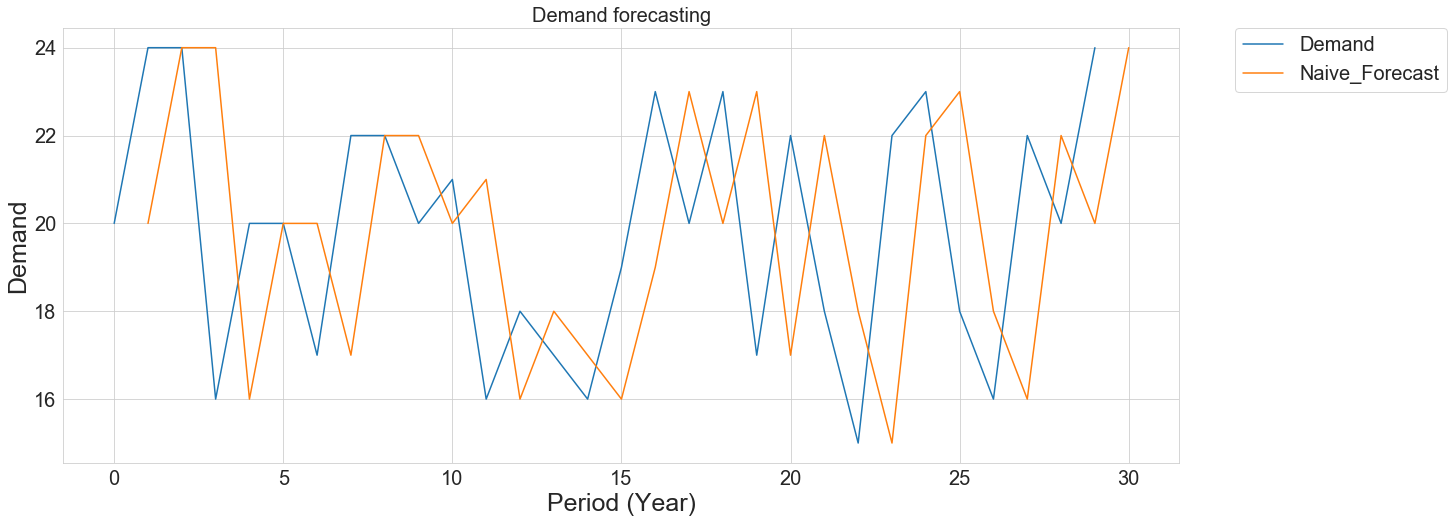

In [68]:
plt.figure(figsize=(20, 8))
demand_plot = plt.plot(demand, label = 'Demand')
forecast_plot = plt.plot(naive_forecast, label = 'Naive_Forecast')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Period (Year)")
plt.ylabel("Demand")
plt.title("Demand forecasting")
plt.show()

## 1.1.1. Some sort of smoothing

We can do:
$$ F_t = \lambda D_{t-1} + (1-\lambda) F_{t-1}$$

where $F_0 = D_0$.

In [91]:
smoothing_factor = 0.6
Smooth_naive_forecast = [np.asarray(demand).T[0][0]]
for t in range(demand.shape[0] - 1):
    Smooth_naive_forecast.append(smoothing_factor*np.asarray(demand).T[0][t] + (1-smoothing_factor)*Smooth_naive_forecast[t])

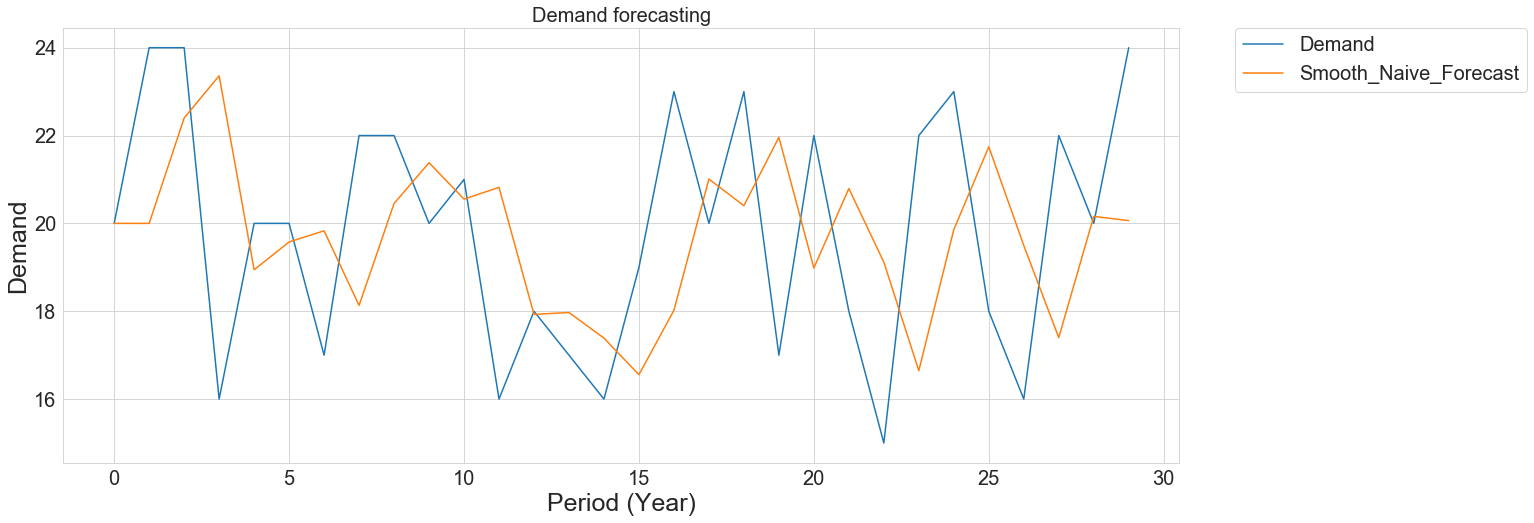

In [92]:
plt.figure(figsize=(20, 8))
demand_plot = plt.plot(demand, label = 'Demand')
# forecast_plot = plt.plot(naive_forecast, label = 'Naive_Forecast')
smooth_forecast_plot = plt.plot(Smooth_naive_forecast, label = 'Smooth_Naive_Forecast')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Period (Year)")
plt.ylabel("Demand")
plt.title("Demand forecasting")
plt.show()

# 2. Cumulative mean

Do:
$$ F_t = \frac{1}{t-1} \sum_{i = 1}^{t-1} D_i$$

Obs:
1) Unlike Naive forecasting, due to averaging term, the noise variance reduces $\to$ Stable method (Random and unpredictable).
2) BIG ASSUMPTION: All prior data is EQUALLY useful.

In [85]:
# pd.expanding(). (mean, sum, etc) = Cumulative expression
cum_mean_forecast = demand.expanding().mean()

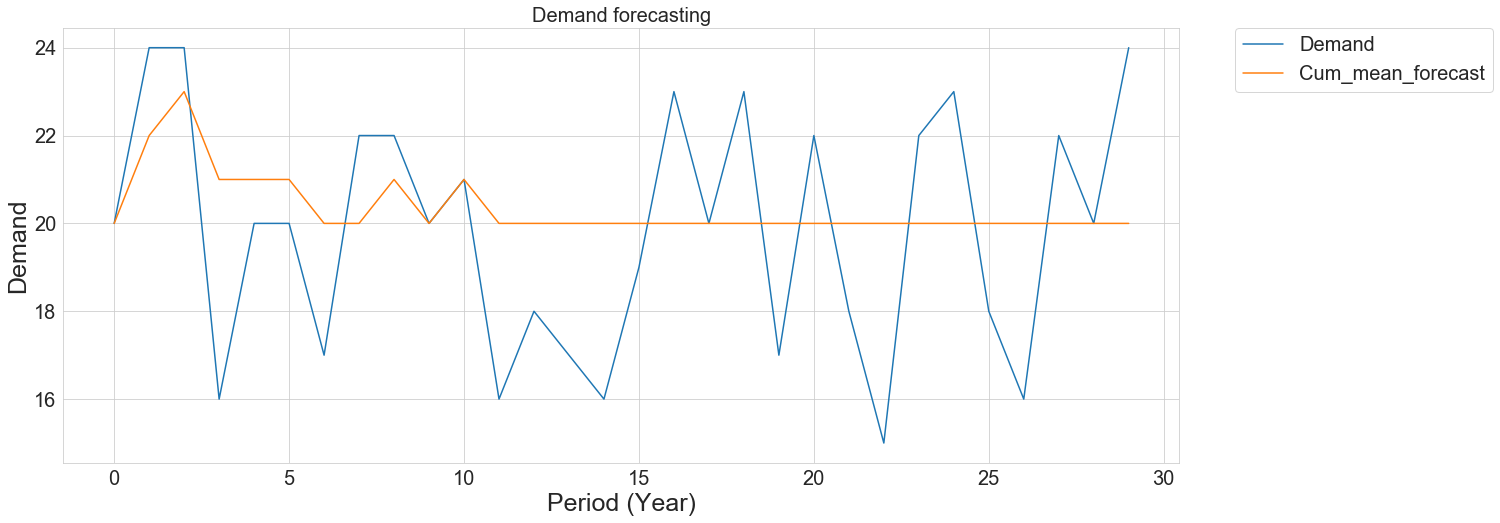

In [88]:
plt.figure(figsize=(20, 8))
demand_plot = plt.plot(demand, label = 'Demand')
# forecast_plot = plt.plot(naive_forecast, label = 'Naive_Forecast')
cum_mean_forecast_plot = plt.plot(cum_mean_forecast.round(0), label = 'Cum_mean_forecast')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("Period (Year)")
plt.ylabel("Demand")
plt.title("Demand forecasting")
plt.show()

# 3. Quiz


In [89]:
Quiz_demand = pd.read_csv("Supply-Chain-Planning-Quiz-Data.csv")